# Predict risk of heart diseases from patient lifestyle information.

## 1. Data import and basic info

### Library import

In [4]:
pip install optuna

In [5]:
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

### Data import

In [6]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### Create function for showing data info

In [7]:
def show_i(data):

    '''Show following info:

    - table size
    - basic info
    - first 10 lines
    - summary statistics for numerical data
    '''

    display(data.shape)
    display(data.info())
    display(data.head(10))
    display(data.describe())

### Function implementation - showing main info

In [8]:
show_i(df_train)

(70000, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


None

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_train.corr(method='spearman', min_periods=1)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.002682,0.003506,-0.001886,-0.001292,0.003258,-0.000238,0.005706,0.002789,-0.003697,0.001214,0.003766,0.003800
age,0.002682,1.000000,-0.020176,-0.082292,0.061559,0.219087,0.156700,0.140113,0.091791,-0.047471,-0.030078,-0.010422,0.234429
gender,0.003506,-0.020176,1.000000,0.533805,0.172480,0.063174,0.066374,-0.035730,-0.018866,0.338135,0.170966,0.005866,0.008109
height,-0.001886,-0.082292,0.533805,1.000000,0.313569,0.019381,0.030534,-0.058940,-0.024369,0.197632,0.096670,-0.007367,-0.012383
weight,-0.001292,0.061559,0.172480,0.313569,1.000000,0.277749,0.254420,0.137908,0.109901,0.071676,0.068088,-0.014894,0.182701
ap_hi,0.003258,0.219087,0.063174,0.019381,0.277749,1.000000,0.735436,0.208722,0.105334,0.028929,0.033243,-0.001268,0.451885
ap_lo,-0.000238,0.156700,0.066374,0.030534,0.254420,0.735436,1.000000,0.167401,0.082474,0.026172,0.038862,0.003401,0.362572
cholesterol,0.005706,0.140113,-0.035730,-0.058940,0.137908,0.208722,0.167401,1.000000,0.407803,0.015220,0.041285,0.007573,0.215117
gluc,0.002789,0.091791,-0.018866,-0.024369,0.109901,0.105334,0.082474,0.407803,1.000000,0.000468,0.018584,-0.008610,0.091488
smoke,-0.003697,-0.047471,0.338135,0.197632,0.071676,0.028929,0.026172,0.015220,0.000468,1.000000,0.340094,0.025858,-0.015486


## 2. Prepocessing

`Summary:` Age preprocessing completed

### Identifying rows with abnormal 'height' value

In [10]:
#display(df_train.sort_values(by='height', ascending=False).head())
#display(df_train.sort_values(by='height', ascending=False).tail(110))
#sorted(df_train['height'].unique()

# finding excessive unusual data
df_train['height'].value_counts().sort_index(ascending=False) 

250     1
207     1
200     1
198    14
197     4
       ..
64      1
60      1
59      1
57      1
55      1
Name: height, Length: 109, dtype: int64

Deleting row with abnormal 'height' value

In [11]:
# removing row with 250 value
df_train.drop(df_train[df_train['height'] == 250].index, inplace=True)

# removing rows with values les than 140
df_train.drop(df_train[df_train['height'] < 140].index, inplace=True)

Check results

In [12]:
#display(df_train.sort_values(by='height', ascending=False).head())
#display(df_train.sort_values(by='height', ascending=False).tail())
#display(sorted(df_train['height'].unique()))
#df_train.info()

# abnormal values removed
df_train['height'].value_counts().sort_index(ascending=False)

207     1
200     1
198    14
197     4
196     6
       ..
144    71
143    46
142    29
141    21
140    48
Name: height, Length: 61, dtype: int64

Age prepocessing is done, excessive values removed

### Checking exessive 'ap_lo' pressure values

In [13]:
#display(df_train.sort_values(by='ap_lo', ascending=False).head())
#display(sorted(df_train['ap_lo'].unique()))

df_train['ap_lo'].value_counts().sort_index(ascending=False)

 11000     1
 10000     3
 9800      1
 9100      1
 9011      2
          ..
 7         2
 6         2
 1         1
 0        21
-70        1
Name: ap_lo, Length: 157, dtype: int64

In [14]:
# converting abnormally high and negative 'ap_lo' to normal
df_train.loc[(df_train["ap_lo"] > 5000), 'ap_lo'] = df_train["ap_lo"] / 100
df_train.loc[(df_train["ap_lo"] == -70), 'ap_lo'] = 70

# removing extreme values
df_train = df_train[df_train["ap_lo"] > 50]
df_train = df_train[df_train["ap_lo"] < 150]

# show values
display(df_train['ap_lo'].value_counts().sort_index(ascending=False))



140.0    31
135.0     1
130.0    35
126.0     2
125.0     2
         ..
56.0      1
55.0      4
54.0      1
53.0      3
52.0      2
Name: ap_lo, Length: 80, dtype: int64

### Checking exessive 'ap_hi' pressure values

In [15]:
#df_train.loc[(df_train["ap_lo"] >= 1000), 'ap_lo'] = df_train["ap_lo"] / 100
#df_train.sort_values(by='ap_hi', ascending=False).head(50)

# unique values
print('Unique values:')
display(sorted(df_train['ap_hi'].unique()))

# value counts
print('Value counts:')
display(df_train['ap_hi'].value_counts().sort_index(ascending=False))

Unique values:


[-150,
 -140,
 -120,
 -115,
 -100,
 7,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 20,
 70,
 80,
 85,
 90,
 93,
 95,
 96,
 97,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 184,
 185,
 187,
 188,
 190,
 191,
 193,
 195,
 197,
 200,
 202,
 210,
 215,
 220,
 230,
 240,
 401,
 701,
 902,
 906,
 907,
 909,
 960,
 1110,
 1130,
 1202,
 1205,
 1300,
 1400,
 1409,
 1420,
 1500,
 1620,
 2000,
 11020,
 11500,
 13010,
 14020,
 16020]

Value counts:


 16020    1
 14020    4
 13010    2
 11500    1
 11020    1
         ..
-100      2
-115      1
-120      2
-140      1
-150      1
Name: ap_hi, Length: 144, dtype: int64

In [16]:
#df_train.loc[(df_train["ap_lo"] > 500)]# = df_train["ap_lo"] / 100

#df_train.loc[(df_train["ap_lo"] > 300) & (df_train["ap_lo"] < 1000), 'ap_lo'] = df_train["ap_lo"] / 10
#display(df_train.sort_values(by='ap_lo', ascending=False).head(10))
#display(df_train.sort_values(by='ap_lo', ascending=True).head(50))
#sorted(df_train['ap_lo'].unique())

In [17]:
# correcting values over 10K dividing them by 100
df_train.loc[(df_train["ap_hi"] >= 10000), 'ap_hi'] = df_train["ap_hi"] / 100

# correcting values over 1K dividing them by 10
df_train.loc[(df_train['ap_hi'] > 1000), 'ap_hi'] = df_train['ap_hi'] // 10

# correcting negative values to positive
df_train.loc[(df_train['ap_hi'] < 0), 'ap_hi'] = abs(df_train['ap_hi'])

# removing incorrect values over 220
df_train.drop(df_train[df_train['ap_hi'] > 220].index, inplace=True)

# check result
df_train['ap_hi'].value_counts().sort_index(ascending=False)

220.0    19
215.0     2
210.0    20
202.0     1
200.0    95
         ..
13.0     12
12.0     73
11.0     28
10.0      6
7.0       1
Name: ap_hi, Length: 118, dtype: int64

`Summary:` 'ap_hi' values processed

### Checking exessive 'weight' values

In [18]:
# df.fruit.value_counts().sort_index(ascending=False).sort_values(ascending=False) 

# checking 'weight' values
display(df_train['weight'].value_counts().sort_index(ascending=False))

# removing values less than 40 kg
df_train = df_train.loc[df_train['weight'] > 40]

200.0    2
183.0    1
180.0    4
178.0    2
177.0    1
        ..
29.0     1
23.0     1
22.0     1
21.0     1
11.0     1
Name: weight, Length: 276, dtype: int64

In [19]:
# checking for exessive values
df_train['weight'].value_counts().sort_index(ascending=False)

200.0     2
183.0     1
180.0     4
178.0     2
177.0     1
         ..
44.0     65
43.0     55
42.2      1
42.0     47
41.0     33
Name: weight, Length: 259, dtype: int64

`Summary:` 'weight' values processed

In [20]:
df_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110.0,80.0,1,1,0,0,1,0
1,1,20228,1,156,85.0,140.0,90.0,3,1,0,0,1,1
2,2,18857,1,165,64.0,130.0,70.0,3,1,0,0,0,1
3,3,17623,2,169,82.0,150.0,100.0,1,1,0,0,1,1
4,4,17474,1,156,56.0,100.0,60.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120.0,80.0,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140.0,90.0,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180.0,90.0,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135.0,80.0,1,2,0,0,0,1


## 3. EDA

Displaying parameters

<AxesSubplot: >

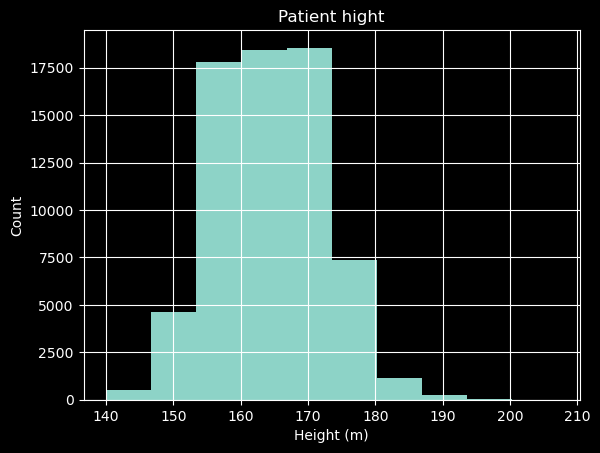

In [21]:
display(df_train['height'].hist())
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.title('Patient hight')
plt.grid(True)


<AxesSubplot: >

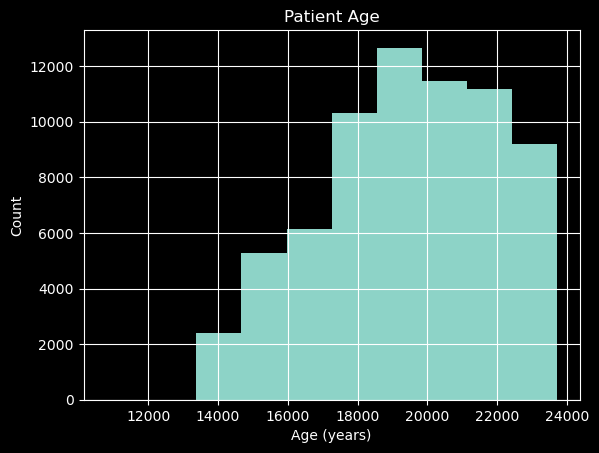

In [22]:
display(df_train['age'].hist())
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Patient Age')
plt.grid(True)

<AxesSubplot: >

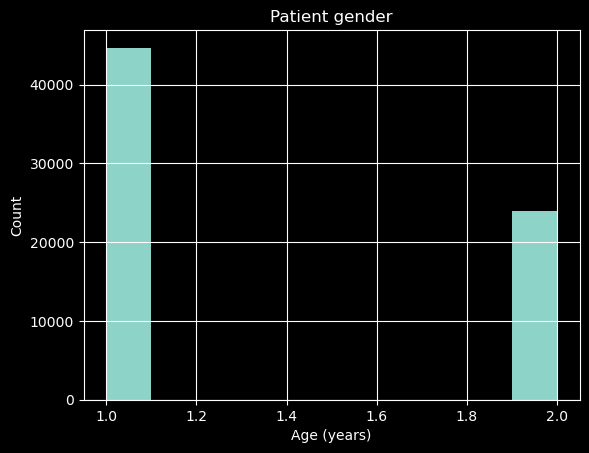

In [23]:
display(df_train['gender'].hist())
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Patient gender')
plt.grid(True)

<AxesSubplot: >

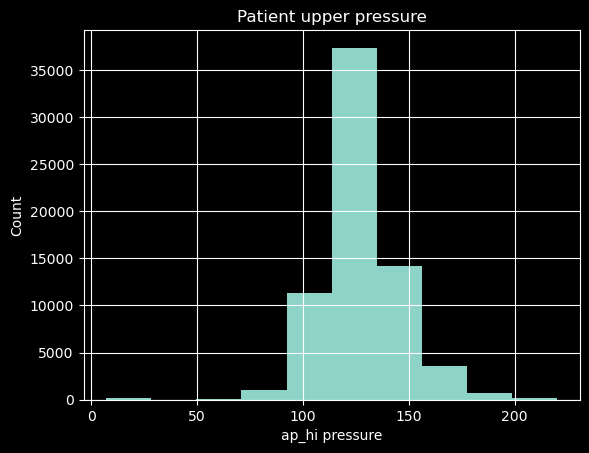

In [24]:
display(df_train['ap_hi'].hist())
plt.xlabel('ap_hi pressure')
plt.ylabel('Count')
plt.title('Patient upper pressure')
plt.grid(True)

<AxesSubplot: >

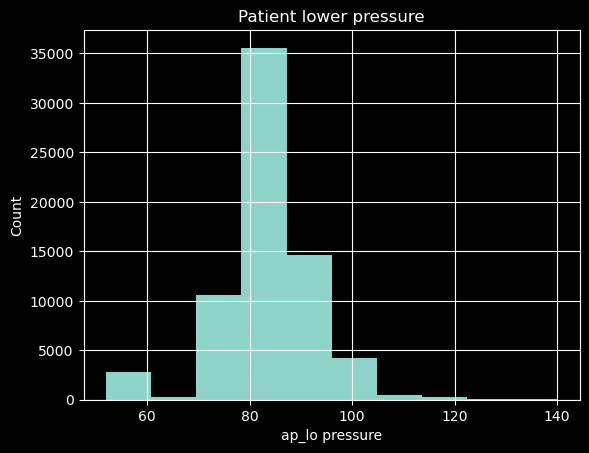

In [25]:
display(df_train['ap_lo'].hist())
plt.xlabel('ap_lo pressure')
plt.ylabel('Count')
plt.title('Patient lower pressure')
plt.grid(True)

In [26]:
df_train.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

<AxesSubplot: >

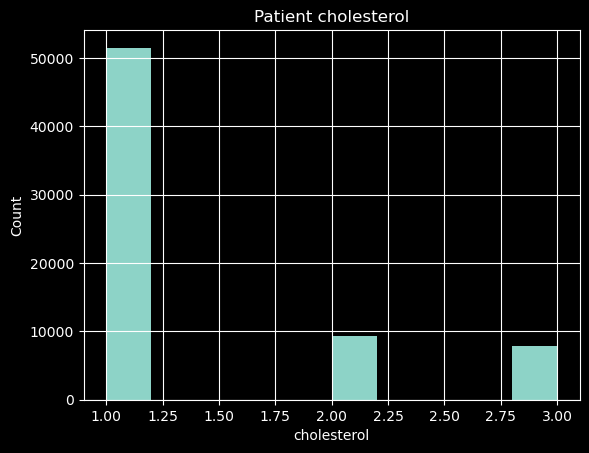

In [27]:
display(df_train['cholesterol'].hist())
plt.xlabel('cholesterol')
plt.ylabel('Count')
plt.title('Patient cholesterol')
plt.grid(True)

<AxesSubplot: xlabel='weight'>

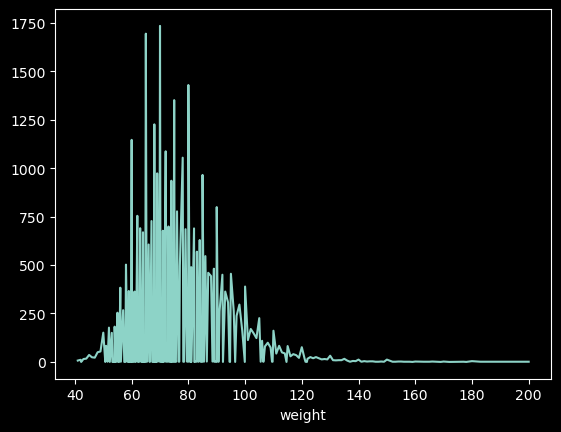

In [28]:
#display(df_train.groupby('age')['cardio'].count().plot())
display(df_train.groupby(['weight'])['cardio'].sum().plot())

<AxesSubplot: xlabel='age'>

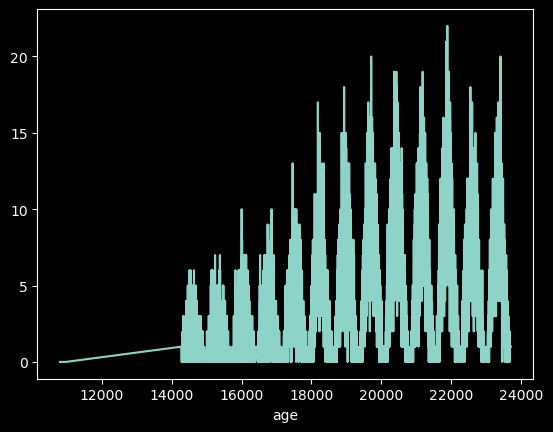

In [29]:
display(df_train.groupby(['age'])['cardio'].sum().plot())

<AxesSubplot: xlabel='ap_hi'>

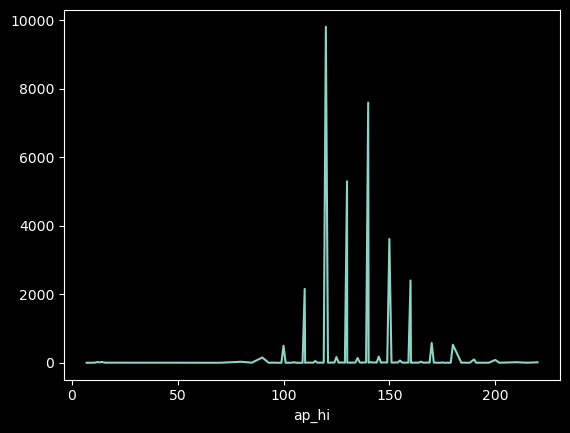

In [30]:
display(df_train.groupby(['ap_hi'])['cardio'].sum().plot())

<AxesSubplot: xlabel='ap_lo'>

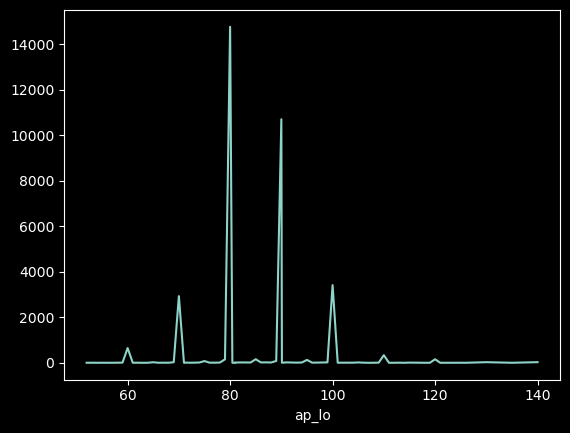

In [31]:
display(df_train.groupby(['ap_lo'])['cardio'].sum().plot())

## 4. ML and model probation

In [32]:
df_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110.0,80.0,1,1,0,0,1,0
1,1,20228,1,156,85.0,140.0,90.0,3,1,0,0,1,1
2,2,18857,1,165,64.0,130.0,70.0,3,1,0,0,0,1
3,3,17623,2,169,82.0,150.0,100.0,1,1,0,0,1,1
4,4,17474,1,156,56.0,100.0,60.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120.0,80.0,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140.0,90.0,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180.0,90.0,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135.0,80.0,1,2,0,0,0,1


Features importance

In [33]:
df_test_ohe_col = df_train.columns
df_test_ohe_col = df_test_ohe_col.drop(['cardio', 'id'])
df_test_ohe_col

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110.0,80.0,1,1,0,0,1,0
1,20228,1,156,85.0,140.0,90.0,3,1,0,0,1,1
2,18857,1,165,64.0,130.0,70.0,3,1,0,0,0,1
3,17623,2,169,82.0,150.0,100.0,1,1,0,0,1,1
4,17474,1,156,56.0,100.0,60.0,1,1,0,0,0,0


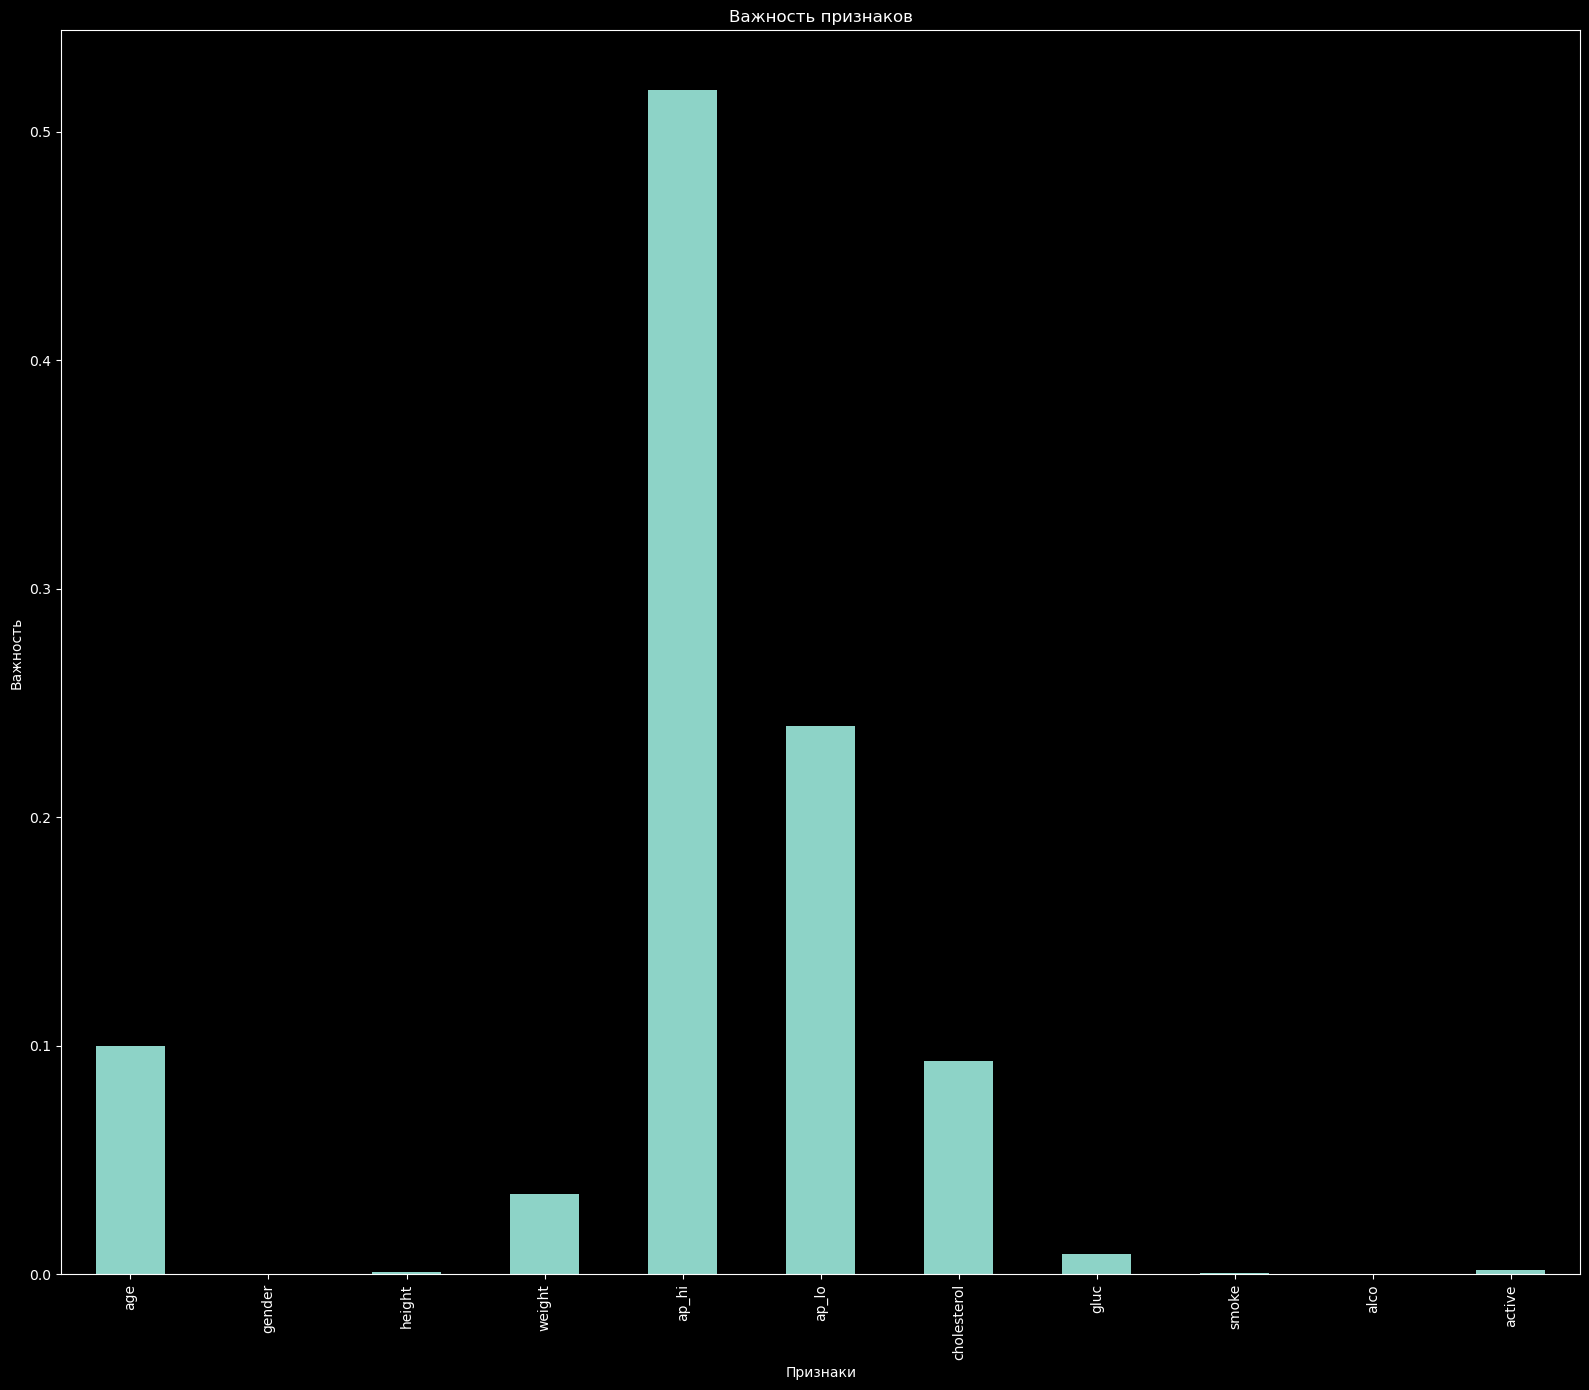

In [34]:
df_test_v = pd.DataFrame(data=df_train, columns=df_test_ohe_col)
df_test_v['cardio'] = df_train['cardio']

display(df_test_v.head())

model = RandomForestClassifier(random_state=42, max_depth = 4)
model.fit(X = df_test_v.drop(['cardio'], axis=1),
y = df_test_v['cardio'])

df_test_imp = pd.Series(model.feature_importances_, df_test_v.drop(['cardio'], axis=1).columns)
fig, ax = plt.subplots(figsize=(16,14))

df_test_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_xlabel('Признаки')
ax.set_ylabel('Важность')
fig.tight_layout()

Split dataset into train & valid 75/25

In [35]:
def split(dataframe):
    # извлекаем признаки, исключаем целевой признак и признак `id` который не имеет предсказательной силы тк это название скважины
    features0 = dataframe.drop(['cardio', 'id'], axis=1) 
    
    # извлекаем целевой признак
    target0 = dataframe['cardio'] 
    
    # делим на обучающую и валидационную выборки в аналогии 75 / 25
    features_train0, features_valid0, target_train0, target_valid0 = train_test_split(

    features0, target0, test_size=.25, random_state=12345
    
    )
    
    return features_train0, target_train0, features_valid0, target_valid0

In [36]:
'''def split(dataframe):
    # извлекаем признаки, исключаем целевой признак и признак `id` который не имеет предсказательной силы тк это название скважины
    features = dataframe.drop(['cardio', 'id'], axis=1) 
    
    # извлекаем целевой признак
    target = dataframe['cardio'] 
  
    
    return features, target'''

"def split(dataframe):\n    # извлекаем признаки, исключаем целевой признак и признак `id` который не имеет предсказательной силы тк это название скважины\n    features = dataframe.drop(['cardio', 'id'], axis=1) \n    \n    # извлекаем целевой признак\n    target = dataframe['cardio'] \n  \n    \n    return features, target"

Assign splited tables to variables

In [37]:
features_train0 = split(df_train)[0]
target_train0 = split(df_train)[1]
features_valid0 = split(df_train)[2]
target_valid0 = split(df_train)[3]

Print table size

In [38]:
print('features', features_train0.shape)
print('target  ', target_train0.shape )
print()
print('features_valid', features_valid0.shape)
print('target_valid  ', target_valid0.shape)

features (51492, 11)
target   (51492,)

features_valid (17165, 11)
target_valid   (17165,)


Logistic regression

In [190]:
# инициализация модели
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=2000)
# обучение модели
model.fit(features, target)

# предсказания модели в абсолютных значениях
predictions_logistic = model.predict(features)

# предсказания модели в вероятностях
probabilities = model.predict_proba(features)

# Значения вероятностей класса «1»
probabilities_to_get_one = probabilities[:, 1]

# кроссвалидация с пятью блоками
mean_score = cross_val_score(model, features, target, cv=5, scoring='roc_auc').mean()

# Вывод метрики Полноты
print('Best roc_auc              ', mean_score)


Best roc_auc               0.7882627443950929


Logistic regression using Randomized search

In [193]:
# инициализация модели (объявляем классификатор)
estimator = LogisticRegression()

# создаём перечень параметров
max_iter = range(1900, 2000)
solver = ['lbfgs', 'newton-cg', 'liblinear']
warm_start = [True, False]
C = np.arange(0, 1, 0.01)

# Отдельно создаем словарик, в который вписываем параметры, которые будем прогонять
params = {'max_iter': max_iter, 'warm_start': warm_start, 'solver': solver, 'C': C}

random_estimator = RandomizedSearchCV(estimator=estimator, param_distributions=params, n_iter=100, scoring='roc_auc', n_jobs=-1, cv=5, verbose=1, random_state=12345)

# обучение модели
random_estimator.fit(features, target)

# предсказания модели в вероятностях
probabilities_rs = random_estimator.predict_proba(features)

# Значения вероятностей класса «1»
probabilities_to_get_one = probabilities_rs[:, 1]

# вывод результатов
print('best LogisticRegression parameters:', random_estimator.best_params_)
print('best LogisticRegression score:     ', random_estimator.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1589, in fit
    fold_coefs_ = Parallel(
  File "c:\Users\ASUS\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\ASUS\anaconda3\lib\site-pack

best parameters: {'warm_start': False, 'solver': 'lbfgs', 'max_iter': 1969, 'C': 0.27}
best score: 0.7883014827398908


Decision Tree

In [205]:
# создаём переменные для выявления лучшей модели и лучшего результата
best_model = None
best_mean_score = 0
best_criterion = 0


creteria_list = ['gini', 'entropy']

# создаём цикл для перебора гиперпараметра criterion
for crit in creteria_list:
	# создаём цикл для перебора глубины дерева
	for depth in range(1, 20):
		# создам переменную и записываем в неё модель с перебором глубины деревьев и добавлением случайности для улучшения результата
		model = DecisionTreeClassifier(criterion=crit, random_state=12345, max_depth= depth)

		# обучаем модель с заданной глубиной дерева
		model.fit(features, target)

		# высчитываем предсказания модели на основе валидационной выборки
		predictions_dt = model.predict(features)

		# высчитываем вероятность предсказания модели на основе валидационной выборки
		probabilities_dt = model.predict_proba(features)

		# Значения вероятностей класса «1»
		probabilities_to_get_one = probabilities_dt[:, 1]
		
	    # кроссвалидация
		mean_score = cross_val_score(model, features, target, cv=5, scoring='roc_auc').mean()
		
		# находим лучшую модель
		if mean_score > best_mean_score:
			best_criterion = crit
			best_mean_score = mean_score
			best_model = model
			
		
		
# выдод результатов классификации    
print('Лучшая модель:                           ', best_model)
print('Лучший критерий:                         ', best_criterion)
print('Лучшая roc_auc:                          ', best_mean_score)

Лучшая модель:                            DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=12345)
Лучший критерий:                          entropy
Лучшая roc_auc:                           0.7924335255376732


Decision Tree using GridSearch

In [207]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(random_state=12345), tree_para, scoring='roc_auc', cv=5)
clf.fit(features, target)

# предсказания модели в вероятностях
probabilities_dt_gs = clf.predict_proba(features)

# Значения вероятностей класса «1»
probabilities_to_get_one = probabilities_dt_gs[:, 1]



# вывод результатов
print('best parameters:', clf.best_params_)
print('best score:', clf.best_score_)

best parameters: {'criterion': 'entropy', 'max_depth': 6}
best score: 0.7924335255376732


Random Forest Classifier using OPTUNA + non-numeric hyperparameters 

In [49]:
max_features = ['auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy']

def objective(trial):
    # Define the hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Create a Random Forest Classifier with the hyperparameters
    clf = RandomForestClassifier(n_estimators=n_estimators, 
                                  max_depth=max_depth, 
                                  min_samples_split=min_samples_split, 
                                  min_samples_leaf=min_samples_leaf,
                                  random_state=42)
    

    # Sample the non-numeric hyperparameters using a custom sampler
    clf.max_features = trial.suggest_categorical('max_features', max_features)
    clf.criterion = trial.suggest_categorical('criterion', criterion)


    # Train the model
    clf.fit(features_train0, target_train0)

    probabilities_test = clf.predict_proba(features_valid0)
    probabilities_to_get_one = probabilities_test[:, 1]
    
    # Predict on the test set and calculate the accuracy
    y_pred = clf.predict(features_valid0)
    #accuracy = accuracy_score(target_valid0, y_pred)
    roc = roc_auc_score(target_valid0, probabilities_to_get_one)
    
    return roc

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and accuracy found
print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)

[I 2023-03-01 15:19:59,573] A new study created in memory with name: no-name-3eb35f21-2e21-4409-b1fe-eef3ed9f9ce8
[I 2023-03-01 15:20:28,486] Trial 0 finished with value: 0.7981272533212529 and parameters: {'n_estimators': 922, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'log2', 'criterion': 'gini'}. Best is trial 0 with value: 0.7981272533212529.
[I 2023-03-01 15:21:04,162] Trial 1 finished with value: 0.7995570748432624 and parameters: {'n_estimators': 975, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'criterion': 'gini'}. Best is trial 1 with value: 0.7995570748432624.
[I 2023-03-01 15:21:08,094] Trial 2 finished with value: 0.7867679388068946 and parameters: {'n_estimators': 232, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'log2', 'criterion': 'gini'}. Best is trial 1 with value: 0.7995570748432624.
[I 2023-03-01 15:21:39,933] Trial 3 finished with value: 0.799475325954

Best hyperparameters: {'n_estimators': 893, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'criterion': 'entropy'}
Best accuracy: 0.7996342757157106


Random Forest Classifier using RandomizedSearchCV

In [208]:
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 10, 1),
    'max_features': ['sqrt', 'log2', None]
}

# Define the random forest classifier estimator
estimator = RandomForestClassifier(random_state=12345)

# Perform randomized search cross-validation
random_search = RandomizedSearchCV(estimator, param_grid, scoring='roc_auc', n_iter=10, cv=5, random_state=12345)
random_search.fit(features, target)

# предсказания модели в вероятностях
probabilities_rf_rs = random_search.predict_proba(features)

# Значения вероятностей класса «1»
probabilities_to_get_one = probabilities_rf_rs[:, 1]

# Print the best estimator and best score
print("Best estimator:", random_search.best_estimator_)
print("Best score roc_auc:", random_search.best_score_)

Best estimator: RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=10, n_estimators=700,
                       random_state=12345)
Best score: 0.8004436119870663


Random Forest Classifier using GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': np.arange(680, 720, 10),
    'max_depth': [9, 10, 11],
    'min_samples_split': np.arange(9, 12, 1),
    'min_samples_leaf': np.arange(1, 5, 1),
    'max_features': ['sqrt', 'log2']
}

# Define the random forest classifier estimator
estimator = RandomForestClassifier(random_state=12345)

# Perform randomized search cross-validation
grid_search = GridSearchCV(estimator, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(features, target)

# предсказания модели в вероятностях
probabilities_rf_rs = grid_search.predict_proba(features)

# Значения вероятностей класса «1»  
probabilities_to_get_one = probabilities_rf_rs[:, 1]

# Print the best estimator and best score
print("Best estimator:", grid_search.best_estimator_)
print("Best score roc_auc:", grid_search.best_score_)

In [ ]:
#rf = RandomForestRegressor(n_estimators=700)
rf = RandomForestClassifier(random_state=12345)
rf.fit(features, target)

sort = rf.feature_importances_.argsort()
plt.barh(boston.feature_names[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

## Application of the best model on Test data

In [39]:
df_test

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,0,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,0,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99984,21722,2,170,103.0,150,90,1,1,0,1,0
29996,99987,18309,1,172,78.0,110,70,1,1,0,0,1
29997,99989,21247,2,169,61.0,120,80,1,1,0,0,0
29998,99994,14509,2,175,80.0,120,80,2,1,0,0,0


In [40]:
df_test['height'].value_counts().sort_index(ascending=False).tail(30)

141    12
140    23
139     2
138     5
137     1
136     3
135     2
134     2
131     1
130     8
127     1
122     1
120    12
119     1
116     1
114     1
110     3
105     1
102     1
100     1
87      1
72      1
68      1
65      2
62      1
60      1
58      1
56      1
52      2
50      1
Name: height, dtype: int64

In [68]:
df_test['weight'].value_counts().sort_index(ascending=False)

183.0    1
180.0    1
178.0    2
175.0    1
173.0    1
        ..
30.0     2
20.0     1
16.3     1
13.0     1
10.0     2
Name: weight, Length: 203, dtype: int64

In [41]:
df_test['age'].value_counts().sort_index(ascending=False)

23705    1
23687    1
23685    1
23683    1
23678    1
        ..
10786    1
10717    1
9158     1
9107     1
8865     1
Name: age, Length: 7244, dtype: int64

In [42]:
df_test.loc[(df_test['height'] < 140), 'height'] = 140
df_test['height'].value_counts().sort_index(ascending=False).tail(30)

169    1175
168    1916
167    1131
166     842
165    2483
164    1463
163    1049
162    1393
161     706
160    2122
159     909
158    1395
157     800
156    1142
155     748
154     652
153     477
152     516
151     250
150     460
149     144
148     147
147      94
146      70
145      50
144      29
143      28
142      12
141      12
140      82
Name: height, dtype: int64

In [43]:
print(df_test['ap_hi'].value_counts().sort_index(ascending=False).tail(25))

 98       1
 97       1
 96       3
 95      18
 91       3
 90     398
 88       1
 85       6
 80      46
 76       1
 70       5
 60       4
 20       1
 19       1
 17       3
 16       3
 15       5
 14       6
 13      12
 12      30
 11      12
 10       3
 1        3
-12       1
-130      1
Name: ap_hi, dtype: int64


In [44]:
#df_test.loc[(df_test['ap_hi'] < 140) & (df_test['ap_hi'] > 130), 'ap_hi'] = 140
df_test.loc[(df_test['ap_hi'] < 140) & (df_test['ap_hi'] > 0), 'ap_hi'] = 140
df_test.loc[(df_test['ap_hi'] == -12), 'ap_hi'] = 120
df_test.loc[(df_test['ap_hi'] == -130), 'ap_hi'] = 130
print(df_test['ap_hi'].value_counts().sort_index(ascending=False).tail(20))

157        3
156        3
155       26
154        4
153        8
152        3
151        5
150     1930
149        5
148        6
147        5
146        2
145       85
144        6
143        4
142        4
141       11
140    25731
130        1
120        1
Name: ap_hi, dtype: int64


In [45]:
print(df_test['ap_hi'].value_counts().sort_index(ascending=False).head(25))

16020     1
14900     1
14020     3
12080     1
12008     1
1608      1
1502      1
1407      1
1400      1
957       1
907       1
906       4
509       1
400       1
240       2
230       1
220       5
213       1
210      11
200      44
198       1
195       1
192       1
190      49
188       2
Name: ap_hi, dtype: int64


In [46]:
df_test.loc[(df_test['ap_hi'] > 10000), 'ap_hi'] = df_test['ap_hi'] // 100

In [47]:
df_test.loc[(df_test['ap_hi'] > 240) & (df_test['ap_hi'] < 1000), 'ap_hi'] = (df_test['ap_hi'] + 1000)  // 100

In [48]:
df_test.loc[(df_test['ap_hi'] > 1000) & (df_test['ap_hi'] < 10000), 'ap_hi'] = df_test['ap_hi']  // 10

In [49]:
print(df_test['ap_hi'].value_counts().sort_index(ascending=False).head(25))

240      2
230      1
220      5
213      1
210     11
200     44
198      1
195      1
192      1
190     49
188      2
185      5
182      2
181      1
180    295
178      1
177      1
176      1
175      4
174      3
173      1
172      4
171      1
170    295
169      1
Name: ap_hi, dtype: int64


In [50]:
print(df_test['ap_hi'].value_counts().sort_index(ascending=False).tail(25))

159        1
158        3
157        3
156        3
155       26
154        4
153        8
152        3
151        5
150     1931
149        6
148        6
147        5
146        2
145       85
144        6
143        4
142        4
141       11
140    25736
130        1
120        3
19         6
15         1
14         1
Name: ap_hi, dtype: int64


In [51]:
df_test.loc[(df_test['ap_hi'] < 120), 'ap_hi'] = df_test['ap_hi'] * 10

In [52]:
print(df_test['ap_hi'].value_counts().sort_index(ascending=False).tail(25))

162        1
161        3
160     1369
159        1
158        3
157        3
156        3
155       26
154        4
153        8
152        3
151        5
150     1932
149        6
148        6
147        5
146        2
145       85
144        6
143        4
142        4
141       11
140    25737
130        1
120        3
Name: ap_hi, dtype: int64


In [53]:
df_test

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,140,80,1,1,0,0,1
1,6,19042,2,170,69.0,140,90,1,1,0,0,1
2,7,20432,1,160,70.0,140,75,1,1,0,0,0
3,10,18133,2,185,94.0,140,90,1,1,0,0,1
4,11,16093,2,170,76.0,140,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99984,21722,2,170,103.0,150,90,1,1,0,1,0
29996,99987,18309,1,172,78.0,140,70,1,1,0,0,1
29997,99989,21247,2,169,61.0,140,80,1,1,0,0,0
29998,99994,14509,2,175,80.0,140,80,2,1,0,0,0


In [54]:
print(df_test['ap_lo'].value_counts().sort_index(ascending=False).head(40))

9100      2
8100      2
8099      1
8022      1
4700      1
4100      1
2088      1
1300      1
1200     12
1130      1
1120      4
1110      5
1101      1
1100     61
1099      2
1066      1
1011      2
1009      1
1004      1
1003      2
1001      1
1000    288
900       1
880       1
809       2
808       1
801       1
800       1
708       1
701       1
570       1
190       2
170       2
160       3
150       5
140      10
130      11
124       1
122       1
120      85
Name: ap_lo, dtype: int64


In [55]:
df_test.loc[(df_test['ap_lo'] > 5000) & (df_test['ap_lo'] < 10000), 'ap_lo'] = df_test['ap_lo']  // 100
df_test.loc[(df_test['ap_lo'] > 4000) & (df_test['ap_lo'] < 5000), 'ap_lo'] = (df_test['ap_lo'] + 10000)  // 100
df_test.loc[(df_test['ap_lo'] >= 1000) & (df_test['ap_lo'] <= 2500), 'ap_lo'] = df_test['ap_lo'] // 10


In [56]:
print(df_test['ap_lo'].value_counts().sort_index(ascending=False).head(40))

900       1
880       1
809       2
808       1
801       1
800       1
708       1
701       1
570       1
208       1
190       2
170       2
160       3
150       5
147       1
141       1
140      10
130      12
124       1
122       1
120      97
116       2
115       2
113       1
112       5
111       5
110     230
109       3
107       2
106       1
105       6
104       3
103       4
102       4
101       5
100    2107
99       11
98       12
97        6
96        7
Name: ap_lo, dtype: int64


In [71]:
print(df_test['cholesterol'].value_counts().sort_index(ascending=False))

3     3430
2     4181
1    22389
Name: cholesterol, dtype: int64


In [57]:
df_test.loc[(df_test['ap_lo'] > 500) & (df_test['ap_lo'] < 1000), 'ap_lo'] = df_test['ap_lo'] // 10

In [58]:
print(df_test['ap_lo'].value_counts().sort_index(ascending=False).head(40))

208       1
190       2
170       2
160       3
150       5
147       1
141       1
140      10
130      12
124       1
122       1
120      97
116       2
115       2
113       1
112       5
111       5
110     230
109       3
107       2
106       1
105       6
104       3
103       4
102       4
101       5
100    2107
99       11
98       12
97        6
96        7
95       62
94        7
93        5
92       10
91        7
90     6145
89       64
88        7
87        8
Name: ap_lo, dtype: int64


In [59]:
print(df_test['ap_lo'].value_counts().sort_index(ascending=False).tail(30))

 67       7
 66       5
 65      32
 64       1
 63       2
 62       3
 61       2
 60    1150
 59      10
 58       1
 57       1
 56       2
 55       1
 54       1
 52       1
 50      17
 49       1
 44       1
 40       3
 30       3
 20       5
 19       1
 12       1
 10       4
 9        1
 8        2
 7        2
 6        1
 0        7
-90       1
Name: ap_lo, dtype: int64


In [60]:
df_test.loc[(df_test['ap_lo'] < 40) & (df_test['ap_lo'] > 0), 'ap_lo'] = 40

In [61]:
df_test.loc[(df_test['ap_lo'] == -90), 'ap_lo'] = 90
df_test.loc[(df_test['ap_lo'] == 0), 'ap_lo'] = 40

In [62]:
print(df_test['ap_lo'].value_counts().sort_index(ascending=False).head(10))

208     1
190     2
170     2
160     3
150     5
147     1
141     1
140    10
130    12
124     1
Name: ap_lo, dtype: int64


In [69]:
df_test['ap_lo'].value_counts().sort_index(ascending=False)

208     1
190     2
170     2
160     3
150     5
       ..
52      1
50     17
49      1
44      1
40     30
Name: ap_lo, Length: 78, dtype: int64

In [ ]:
'''Best estimator: RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=10, n_estimators=700,
                       random_state=12345)'''

In [63]:
df_test

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,140,80,1,1,0,0,1
1,6,19042,2,170,69.0,140,90,1,1,0,0,1
2,7,20432,1,160,70.0,140,75,1,1,0,0,0
3,10,18133,2,185,94.0,140,90,1,1,0,0,1
4,11,16093,2,170,76.0,140,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99984,21722,2,170,103.0,150,90,1,1,0,1,0
29996,99987,18309,1,172,78.0,140,70,1,1,0,0,1
29997,99989,21247,2,169,61.0,140,80,1,1,0,0,0
29998,99994,14509,2,175,80.0,140,80,2,1,0,0,0


In [64]:
'''features_test = split(df_test)[0]
target_test = split(df_test)[1]'''

features_test = df_test.drop(['id'], axis=1)
    
# извлекаем целевой признак
#target = df_test['cardio'] 

## Проверка тестовой модели

In [ ]:
'''Best hyperparameters: {'n_estimators': 893, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'criterion': 'entropy'}
Best accuracy: 0.7996342757157106'''

In [65]:
# Define the random forest classifier estimator
estimator = RandomForestClassifier(max_depth=10, max_features='sqrt', criterion= 'entropy', min_samples_leaf=1,
                       min_samples_split=10, n_estimators=893,
                       random_state=42)

# Perform randomized search cross-validation
estimator.fit(features_train0, target_train0)

# предсказания модели в вероятностях
probabilities_rf_rs = estimator.predict_proba(features_test)

# Значения вероятностей класса «1»
probabilities_to_get_one = probabilities_rf_rs[:, 1]

# создаём целевой признак и записываем в него Значения вероятностей класса «1» на тестовой выборке
df_test['cardio']  = probabilities_to_get_one

#roc = roc_auc_score(target_test, probabilities_to_get_one)

# Print the best estimator and best score
#print("Best estimator:", estimator.best_estimator_)
#print("Best score roc_auc:", estimator.best_score_)


In [77]:
df_test

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,5,18888,1,154,85.0,140,80,1,1,0,0,1,0.771766
1,6,19042,2,170,69.0,140,90,1,1,0,0,1,0.826573
2,7,20432,1,160,70.0,140,75,1,1,0,0,0,0.756900
3,10,18133,2,185,94.0,140,90,1,1,0,0,1,0.837230
4,11,16093,2,170,76.0,140,80,1,1,0,0,1,0.789597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99984,21722,2,170,103.0,150,90,1,1,0,1,0,0.835380
29996,99987,18309,1,172,78.0,140,70,1,1,0,0,1,0.761462
29997,99989,21247,2,169,61.0,140,80,1,1,0,0,0,0.800352
29998,99994,14509,2,175,80.0,140,80,2,1,0,0,0,0.801407


In [78]:
test1 = pd.read_csv('test.csv')
test1['cardio'] = df_test['cardio']
test1 = test1[['id', 'cardio']]

In [79]:
test1

,id,cardio
0,5,0.771766
1,6,0.826573
2,7,0.756900
3,10,0.837230
4,11,0.789597
...,...,...
29995,99984,0.835380
29996,99987,0.761462
29997,99989,0.800352
29998,99994,0.801407


In [80]:
test1.to_csv('sample_submission3.csv', index=False)

In [81]:
test1

,id,cardio
0,5,0.771766
1,6,0.826573
2,7,0.756900
3,10,0.837230
4,11,0.789597
...,...,...
29995,99984,0.835380
29996,99987,0.761462
29997,99989,0.800352
29998,99994,0.801407


In [66]:
from pickle import dump, load

In [67]:
with open('model.pcl', 'wb') as fid:
    dump(estimator, fid)